# 1. 决策树回归

In [75]:
import matplotlib.pyplot as plt
import numpy as np

In [76]:
import pandas as pd
from sklearn.model_selection import train_test_split

boston = pd.read_csv("../assets/Boston.csv")
x = boston.values[:,12]
y = boston["medv"].values
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=233)
x_train = x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)

In [77]:
from sklearn.tree import DecisionTreeRegressor

reg = DecisionTreeRegressor()
reg.fit(x_train,y_train)

DecisionTreeRegressor()

In [78]:
reg.score(x_train,y_train)

0.9692259549761935

In [79]:
reg.score(x_test,y_test)

0.3495233434727286

可以看到训练集上得分很高,测试集上得分却很低,说明存在严重的过拟合问题

# 2. 绘制学习曲线
画出不同深度的决策树在训练集和测试集上的拟合情况

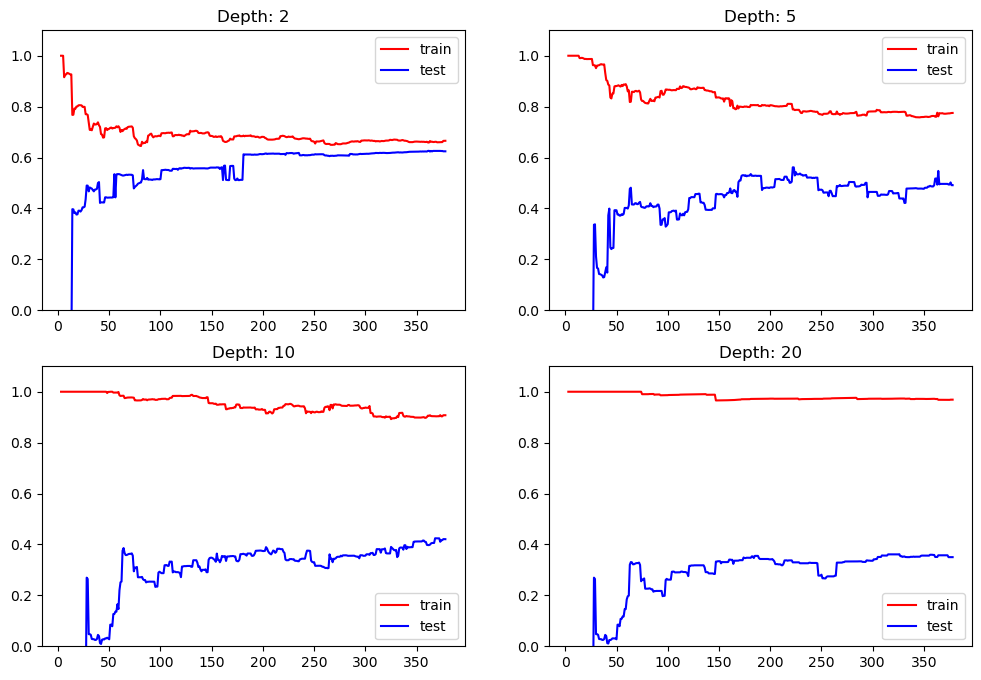

In [ ]:
from sklearn.metrics import r2_score

plt.rcParams["figure.figsize"] = (12, 8)
max_depth = [2, 5, 10, 20]    
for i, depth in enumerate(max_depth):
    
    reg = DecisionTreeRegressor(max_depth=depth)
    train_error, test_error = [], []
    # 训练集大小从3到len(x_train)
    for k in range(3,len(x_train)):
        reg.fit(x_train[:k], y_train[:k])
        
        y_train_pred = reg.predict(x_train[:k])
        train_error.append(r2_score(y_train[:k], y_train_pred))
        
        y_test_pred = reg.predict(x_test)
        test_error.append(r2_score(y_test, y_test_pred))
    
    plt.subplot(2, 2, i + 1)
    plt.ylim(0, 1.1)
    plt.title("Depth: {0}".format(depth))
    plt.plot([k for k in range(3, len(x_train))], train_error, color = "red", label = 'train')
    plt.plot([k for k in range(3, len(x_train))], test_error, color = "blue", label = 'test')
    plt.legend()

plt.show()

可以看到, 当深度增大时, 虽然训练集效果越来越好, 但是测试集效果却很差
说明层数约深, 过拟合约严重

# 3. 网格搜索

In [81]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [n for n in range(2, 15)],
    'min_samples_leaf': [sn for sn in range(3, 20)],
}

grid = GridSearchCV(
    estimator = DecisionTreeRegressor(), 
    param_grid = params, 
    n_jobs = -1
)

In [82]:
grid.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14],
                         'min_samples_leaf': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                              13, 14, 15, 16, 17, 18, 19]})

In [83]:
grid.best_params_

{'max_depth': 3, 'min_samples_leaf': 11}

In [84]:
grid.best_score_

np.float64(0.6477749983041007)

In [85]:
reg = grid.best_estimator_

In [86]:
reg.score(x_test, y_test)

0.6362597629429555